## Sentiment Analysis through Text

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
db=pd.read_csv(r"D:\Naresh IT\Project\Akshay Project\Project12-Sentiment analysis through Text\emotion_dataset_raw.csv")

In [4]:
db

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


<function matplotlib.pyplot.show(close=None, block=None)>

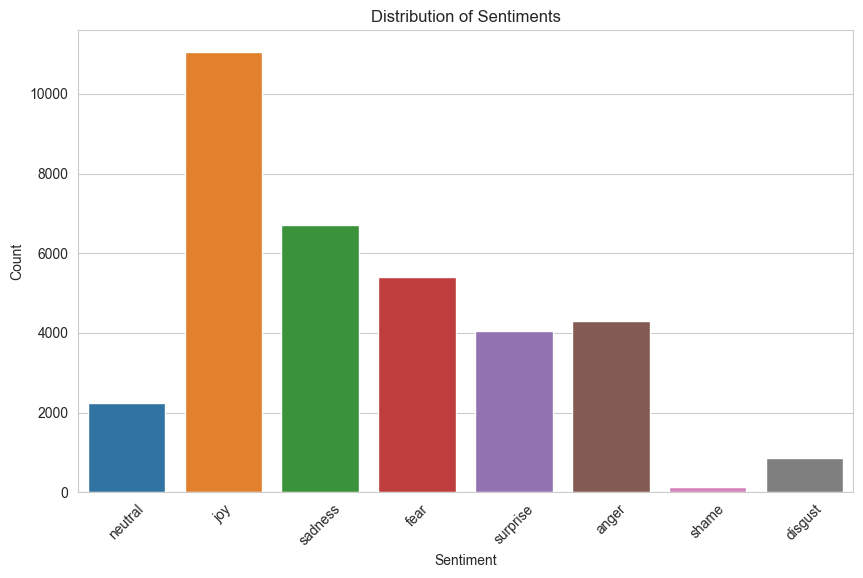

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=db)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

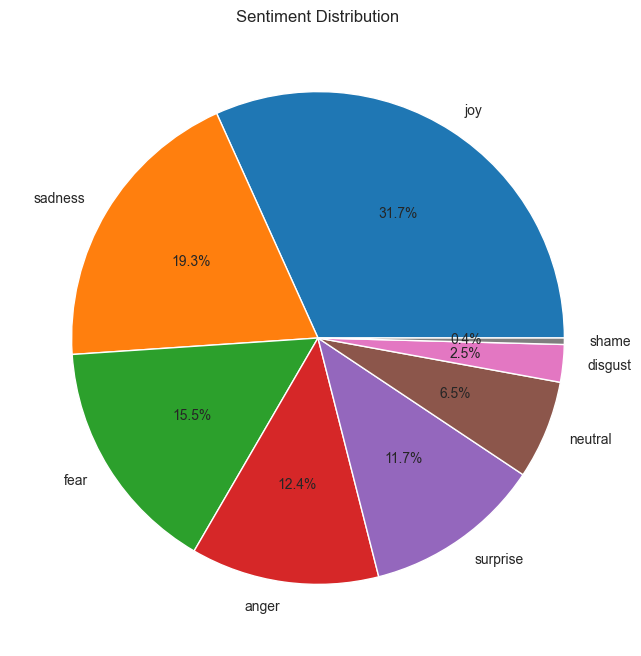

In [8]:
plt.figure(figsize=(8, 8))
db['Emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show

In [12]:
from wordcloud import WordCloud

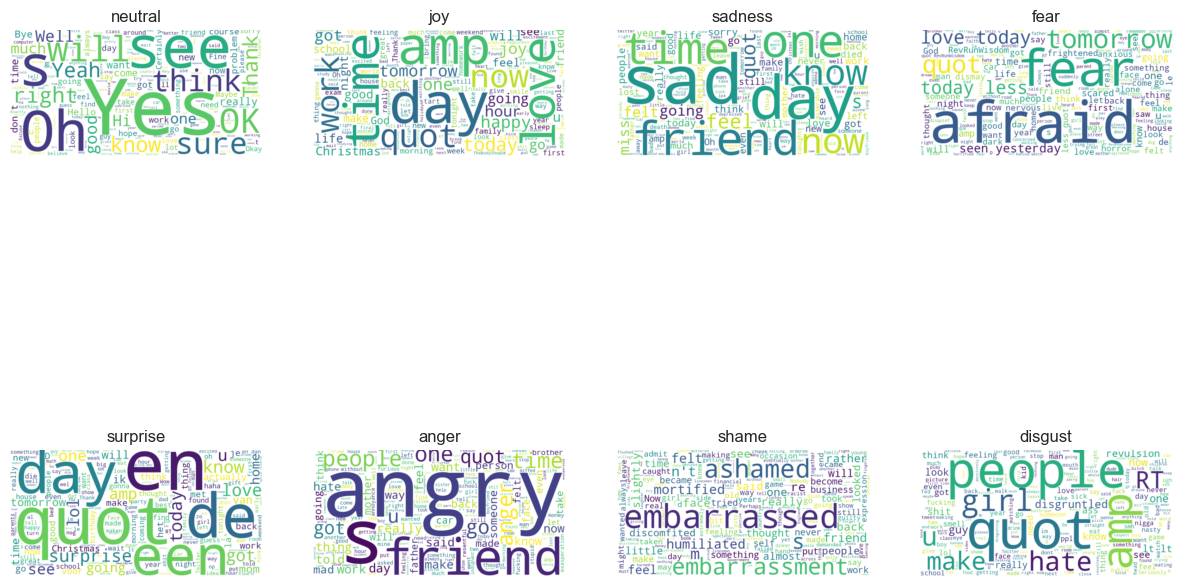

In [15]:
sentiments=db['Emotion'].unique()
plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 4, i)
    text = ' '.join(db[db['Emotion'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(sentiment)
    plt.axis('off')
plt.show()

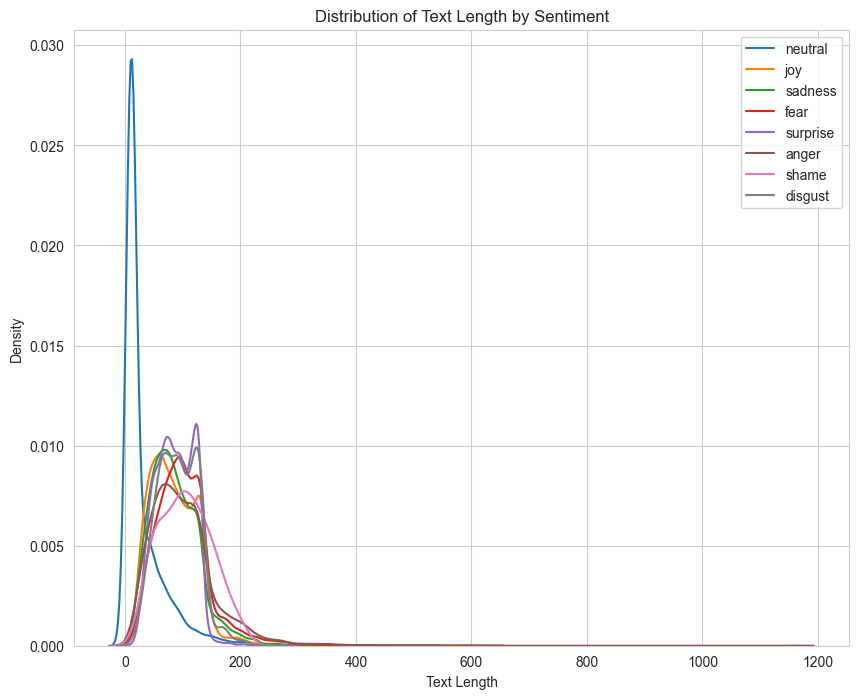

In [16]:
plt.figure(figsize=(10, 8))
for sentiment in sentiments:
    sns.distplot(db[db['Emotion'] == sentiment]['Text'].apply(len), label=sentiment, hist=False)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

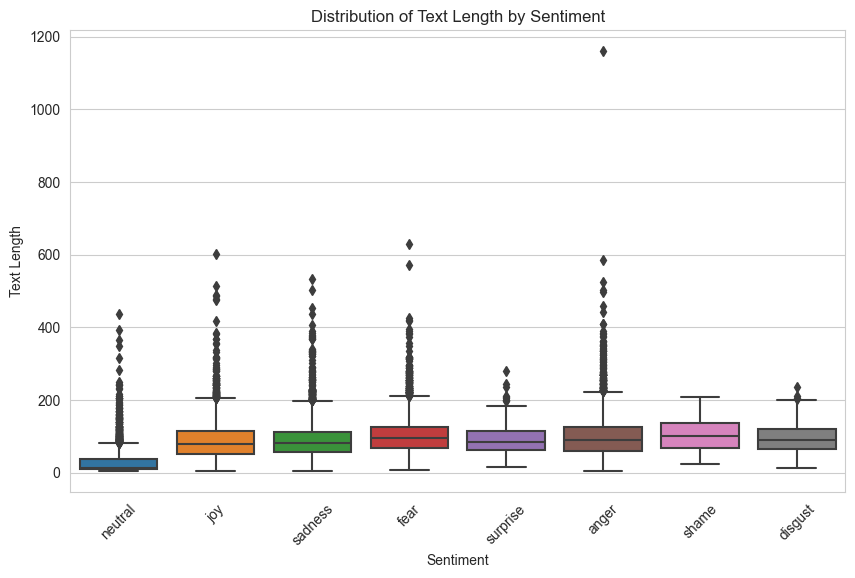

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y=db['Text'].apply(len), data=db)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()

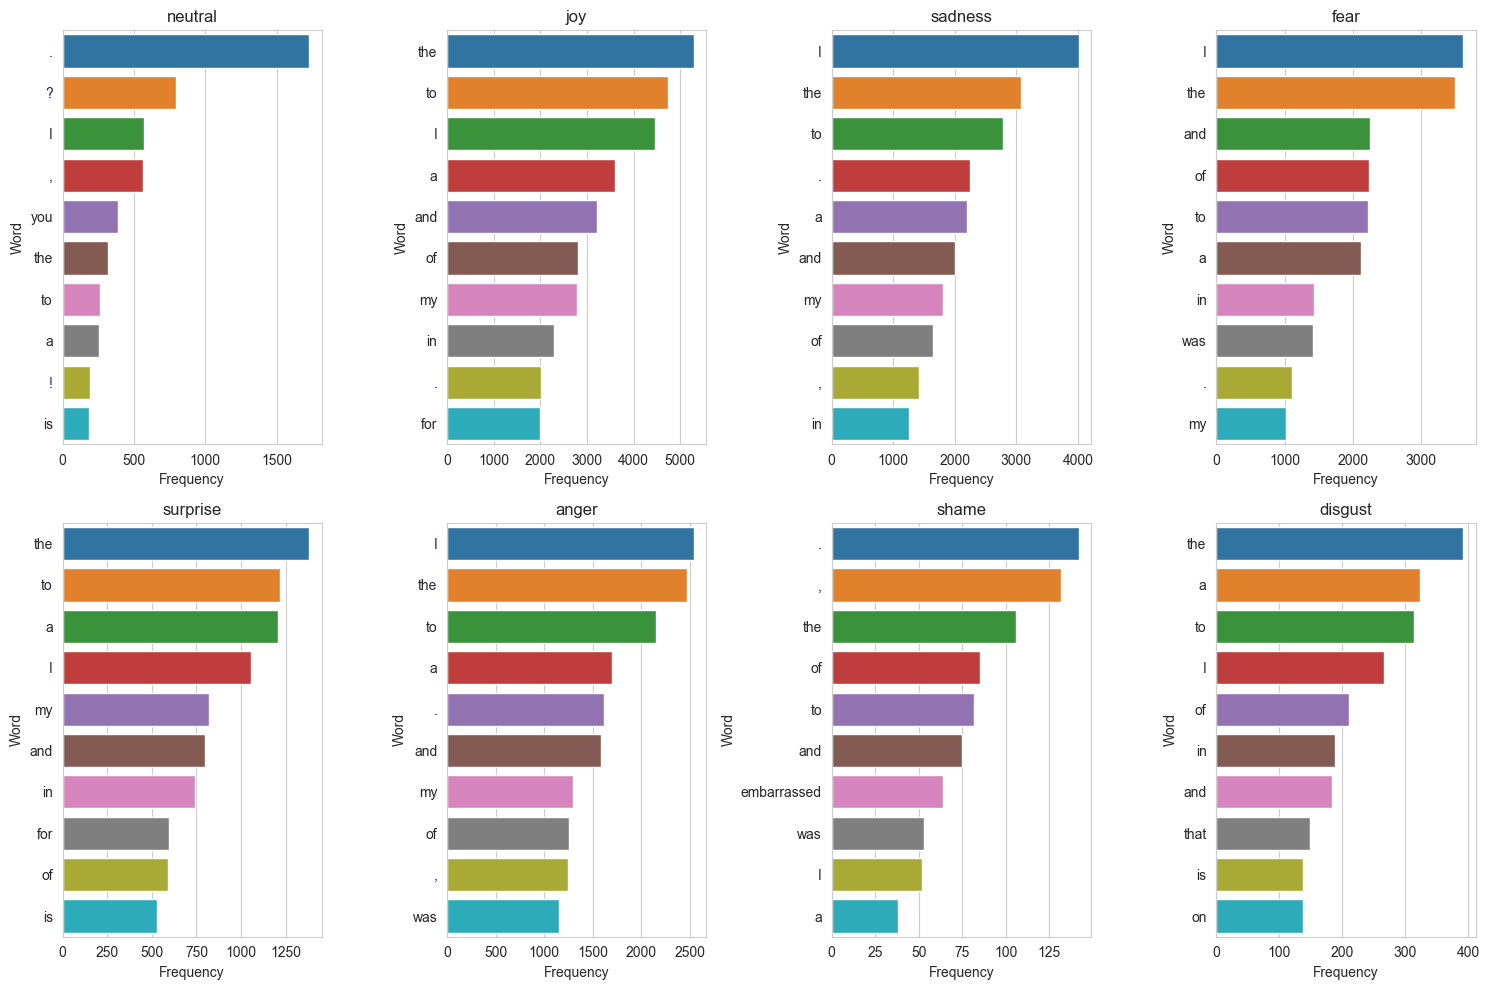

In [18]:
from collections import Counter

plt.figure(figsize=(15, 10))
top_n = 10
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 4, i)
    text = ' '.join(db[db['Emotion'] == sentiment]['Text'])
    words = text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(top_n)
    top_words_db = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    sns.barplot(x='Frequency', y='Word', data=top_words_db)
    plt.title(sentiment)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
plt.tight_layout()
plt.show()